# Python Project for Data Science - Final Assignment

## - Extracting and Visualizing Stock Data

In [3]:
# Importing the required libraries
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Question 1: Use yfinance to Extract Stock Data

In [4]:
Tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = Tesla.history(period = "max")

In [6]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

In [15]:
def get_alpha_vantage_revenue_data(api_key, stock_symbol):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "INCOME_STATEMENT",
        "symbol": stock_symbol,
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "quarterlyReports" in data:
        revenue_data = data["quarterlyReports"]
        revenue_df = pd.DataFrame(revenue_data)
        return revenue_df[["fiscalDateEnding", "totalRevenue"]]
    else:
        return None

In [16]:
# Ticker symbol for Tesla
ticker_symbol = "TSLA"

# Extract revenue data for Tesla using Alpha Vantage API
alpha_vantage_api_key = "A1B2C3D4E5F6G7H8I9J0K1L2M3N4O5P6Q7R8S9T0U1V2W3X4Y5Z6"
tesla_revenue_data = get_alpha_vantage_revenue_data(alpha_vantage_api_key, ticker_symbol)

print(tesla_revenue_data)

   fiscalDateEnding totalRevenue
0        2023-06-30  24927000000
1        2023-03-31  23329000000
2        2022-12-31  24318000000
3        2022-09-30  21454000000
4        2022-06-30  16934000000
5        2022-03-31  18756000000
6        2021-12-31  17719000000
7        2021-09-30  13757000000
8        2021-06-30  11958000000
9        2021-03-31  10389000000
10       2020-12-31  10744000000
11       2020-09-30   8771000000
12       2020-06-30   6036000000
13       2020-03-31   5985000000
14       2019-12-31   7384000000
15       2019-09-30   6303000000
16       2019-06-30   6350000000
17       2019-03-31   4541000000
18       2018-12-31   7226000000
19       2018-09-30   6824000000


### Question 3: Use yfinance to Extract Stock Data

In [17]:
GameStop = yf.Ticker("GME")

In [18]:
gme_data = GameStop.history(period = 'max')

In [19]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

In [26]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [23]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

In [27]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>]


In [29]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [34]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.tail()


        Date        	Revenue
--------------------------------
59	2006-01-31	1667
60	2005-10-31	534
61	2005-07-31	416
62	2005-04-30	475
63	2005-01-31	709



### Question 5: Plot Tesla Stock Graph

In [36]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

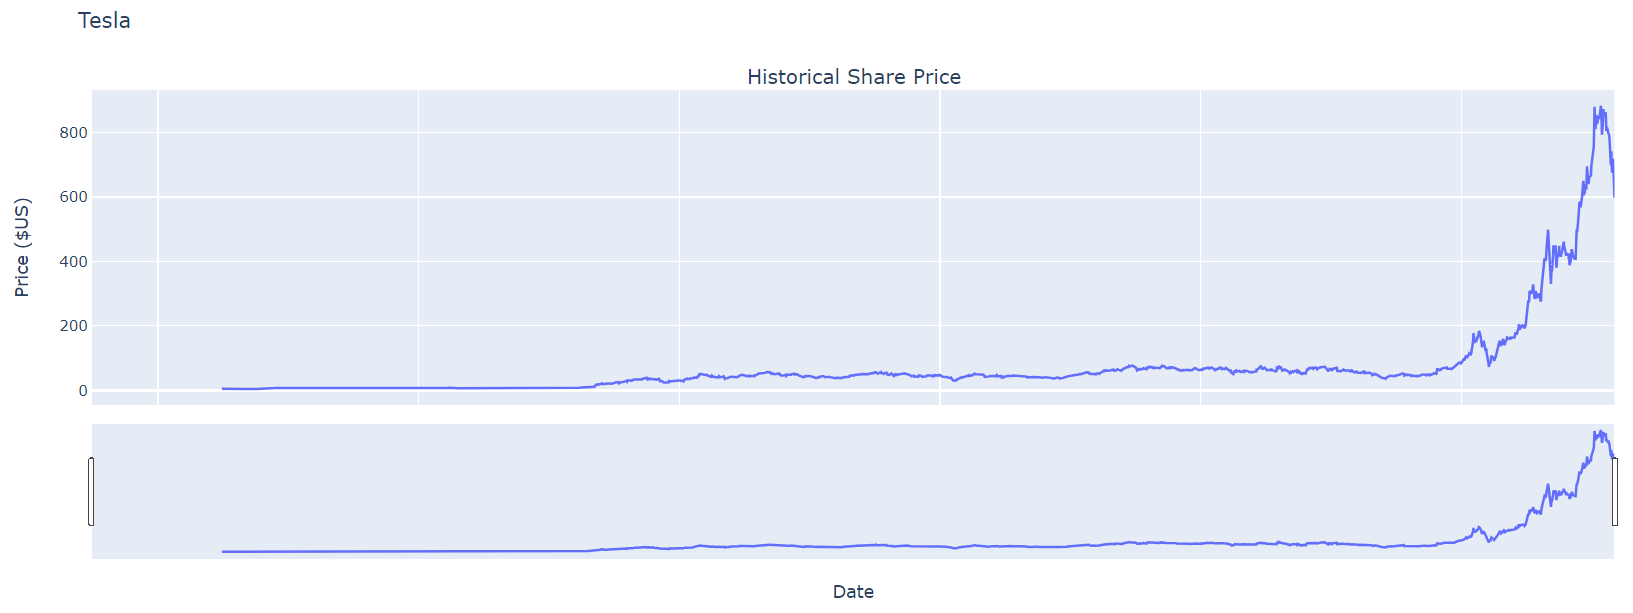

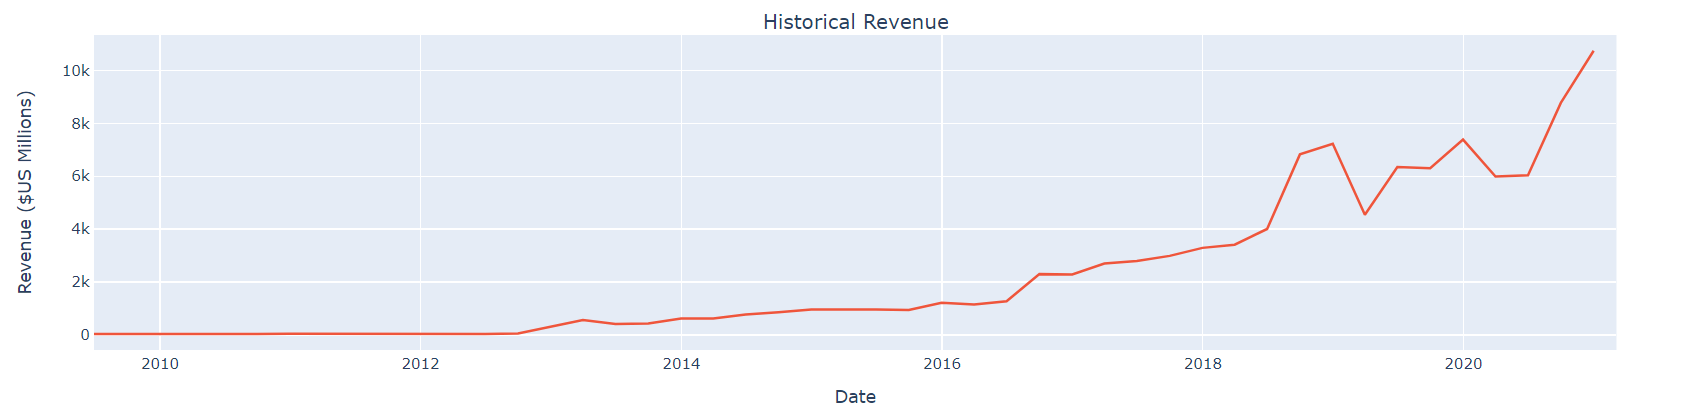

### Question 6: Plot GameStop Stock Graph

In [38]:
make_graph(gme_data, gme_revenue, 'GameStop')

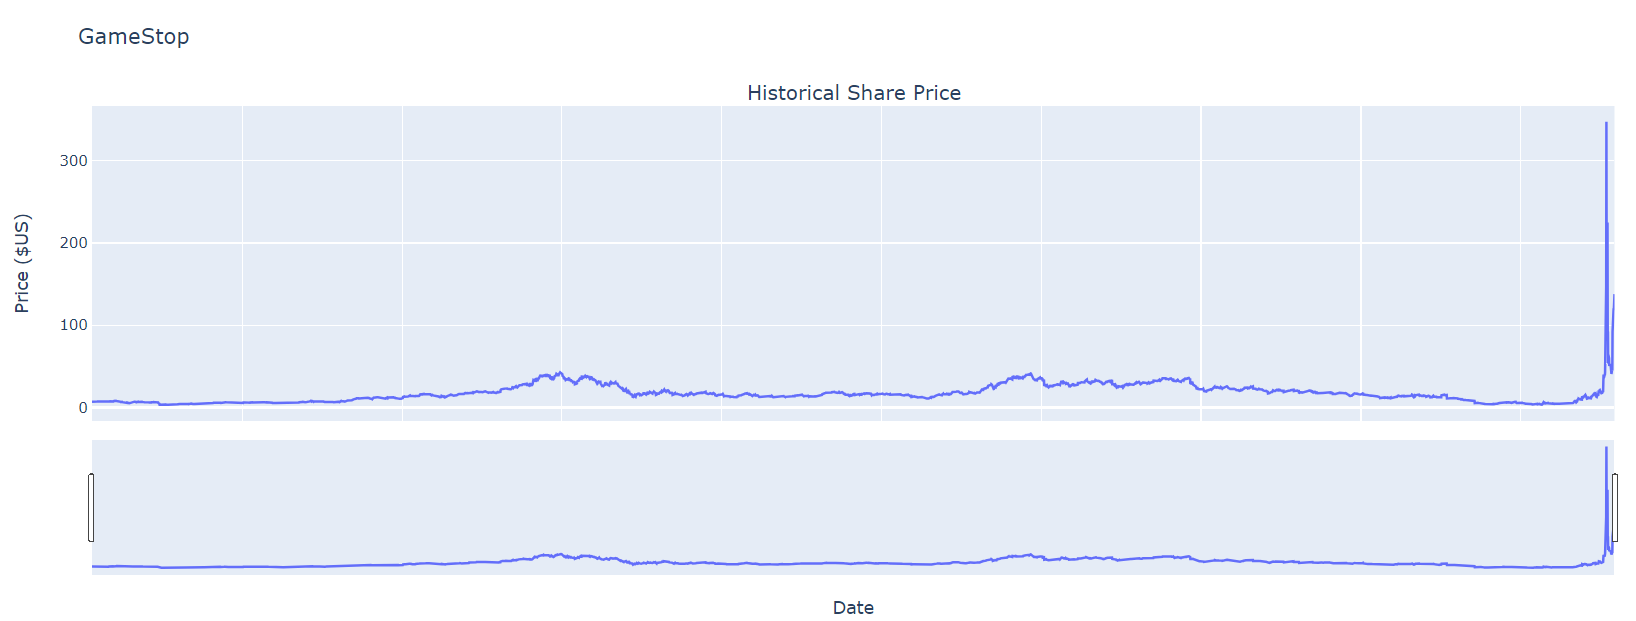

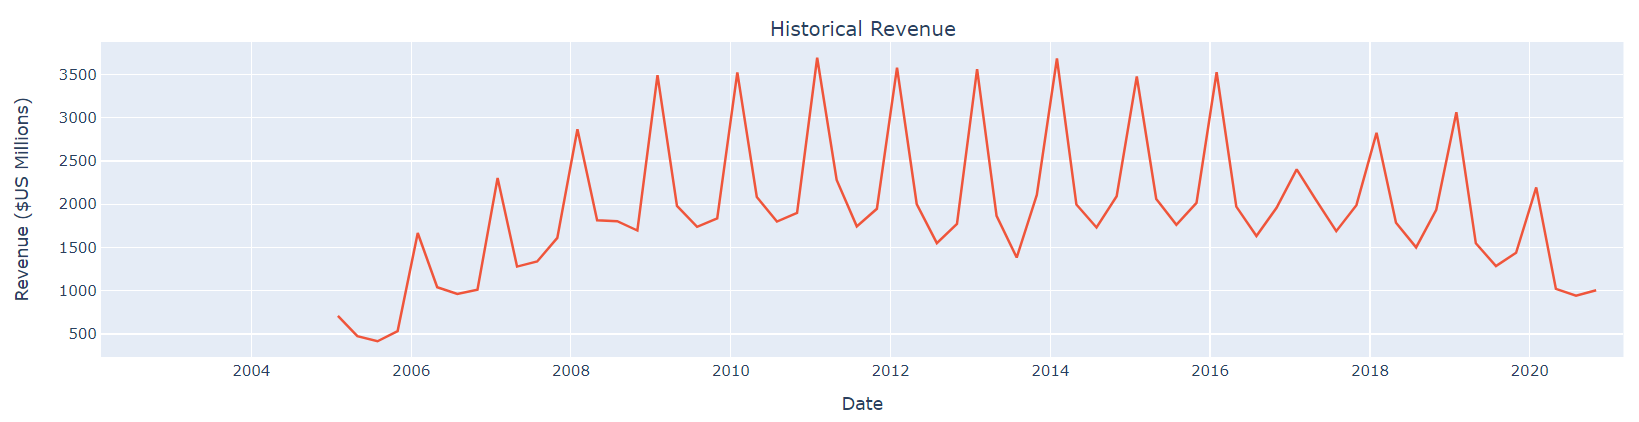